# Rotating an image

Implementing image rotation from scratch.

In a cartesian coordinate system rotation operation can be done by multiplying a rotation matrix to the coordinates.
In a homogenious coordinate system other operations such as scale and translation can also be done by matrix multiplication operation. 

## Loading the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Loading an image

Image Shape: (392, 596, 3)


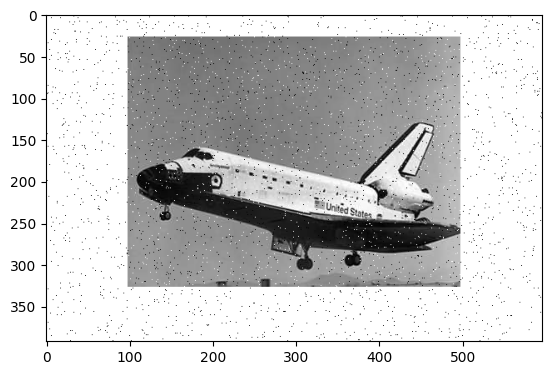

In [2]:
filename = "./Data/image_salt_and_pepper.PNG"
image = cv2.imread(filename)
height, width, channels = image.shape
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Image Shape: {}".format(image.shape))

plt.imshow(image);

## Define the rotation function

The function gets the image that can have color channels,
the other parameters are the angle of roation in degrees and the pivot point of the roation.

The pivot point is by default the center of the image but can be set to be 'top-left', 'top-right', 'bottom-right', 'bottom-left'

In [3]:
def rotate_image(image, angle = 0, pivot = 'center'):
    
    rotated_image = np.zeros_like(image)
    angle = angle * np.pi / 180.0 #convert angle from degrees to radians
    height, width, channels = image.shape
    Rot = np.array([
                    [np.cos(angle), -np.sin(angle)],
                    [np.sin(angle),  np.cos(angle)]
                  ])
    
    #find the center of rotation
    if pivot == 'center':
        center_row, center_col = height / 2, width / 2 
    elif pivot == 'top-left':
        center_row, center_col = 0, 0 
    elif pivot == 'top-right':
        center_row, center_col = 0, width - 1 
    elif pivot == 'bottom-right':
        center_row, center_col = height - 1, width - 1
    elif pivot == 'bottom-left':
        center_row, center_col = height - 1, 0 
        
    for row in range(height):
        for col in range(width):
            pre_rotation_coordinates = [row - center_row, col - center_col]
            post_row, post_col = np.dot(Rot, pre_rotation_coordinates) + [center_row, center_col]
            post_row, post_col = int(post_row), int(post_col)
            
            if post_row >=0 and post_col >=0 and post_row < height and post_col < width:
                rotated_image[row][col][:] = image[post_row][post_col][:]
                    
    return rotated_image.astype("uint8")            
    

## Performing some examples

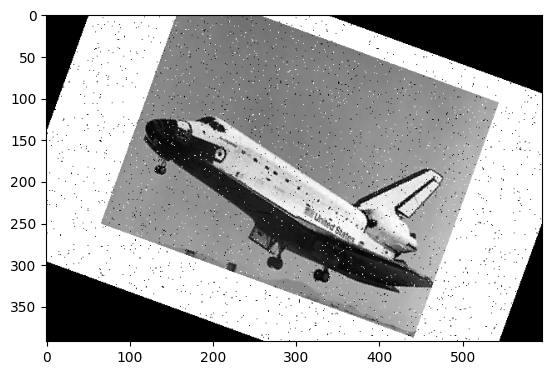

In [4]:
rotated_image = rotate_image(image, 20)
plt.imshow(rotated_image);

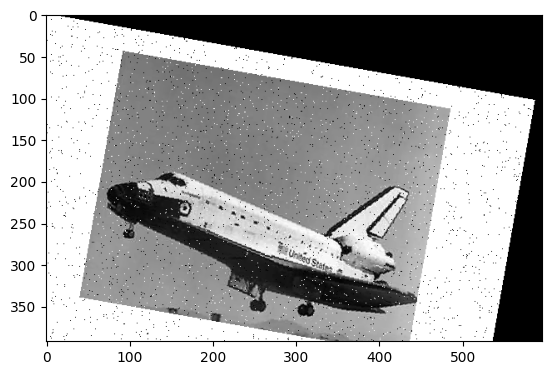

In [5]:
rotated_image = rotate_image(image, 10, 'top-left')
plt.imshow(rotated_image);

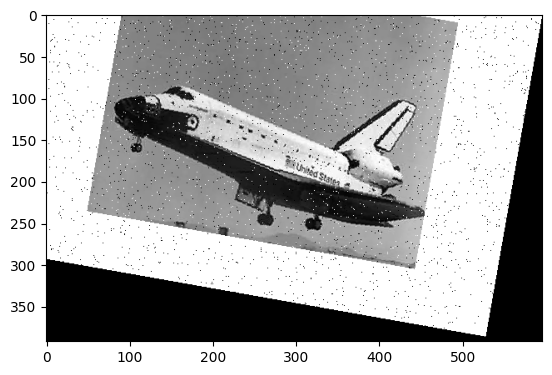

In [6]:
rotated_image = rotate_image(image, 10, 'top-right')
plt.imshow(rotated_image);

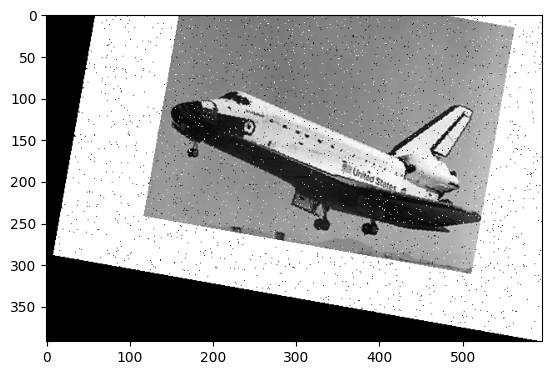

In [7]:
rotated_image = rotate_image(image, 10, 'bottom-right')
plt.imshow(rotated_image);

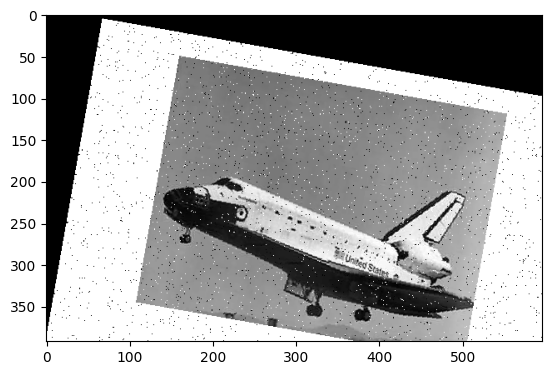

In [8]:
rotated_image = rotate_image(image, 10, 'bottom-left')
plt.imshow(rotated_image);